# *Import Library and Data*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
!gdown 'https://drive.google.com/file/d/1E495OS2vAcD4Aqw5_-j--6JPHTZBv_wH/view?usp=sharing' --fuzzy -O customer_churn.csv

Downloading...
From: https://drive.google.com/uc?id=1E495OS2vAcD4Aqw5_-j--6JPHTZBv_wH
To: /content/customer_churn.csv
100% 978k/978k [00:00<00:00, 44.1MB/s]


In [ ]:
df = pd.read_csv('customer_churn.csv')

# *Data Visualize*

In [ ]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
a={}
for i in df.columns:
  a[i]=df[i].value_counts().shape[0]

pd.DataFrame(a, index=["Unique Value"]).T

,Unique Value
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


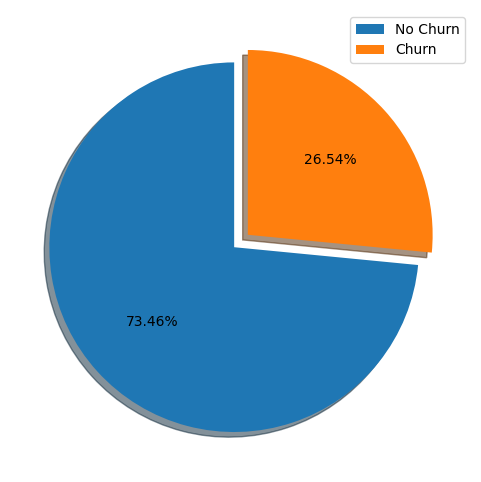

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(df['Churn'].value_counts(), explode=(0.05,0.05), autopct='%.2f%%', startangle=90, shadow=True,  data=df)
plt.legend(['No Churn', 'Churn'])

- *Class imbalance -> Cross validation*

In [ ]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()


,Churn
gender,
Female,2549
Male,2625


In [ ]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

,Churn
gender,
Female,939
Male,930


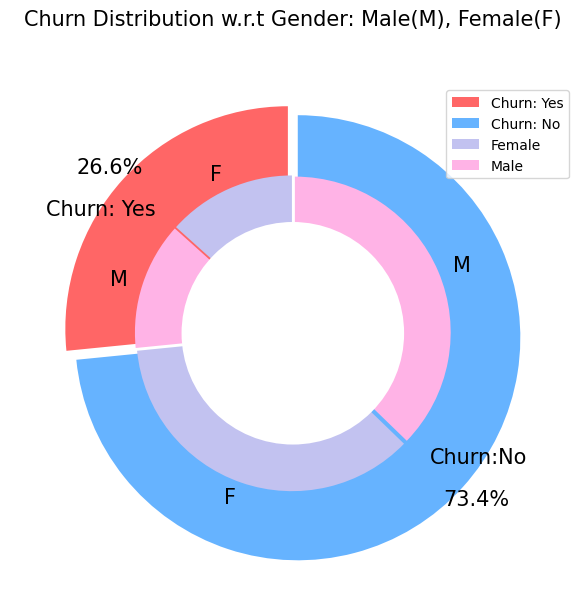

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}

plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )


plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
plt.legend(['Churn: Yes', 'Churn: No', 'Female', 'Male'], loc = 'upper right')

centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)



plt.axis('equal')
plt.tight_layout()
plt.show()

- Genders dont contribute much to the output

<Axes: xlabel='PhoneService', ylabel='count'>

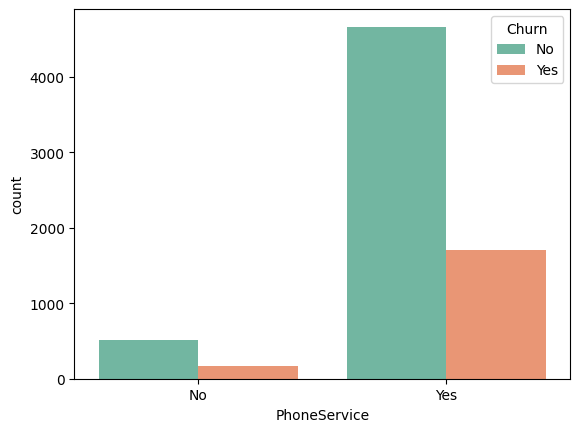

In [ ]:
sns.countplot(x='PhoneService', hue='Churn', data=df, palette='Set2')

- Both customers using Phone Service or not using Phone Service have the same fashion when it come to migrating to another provider firm (Do not contribute much to the output)

In [ ]:
value_1 = df['MultipleLines'][df['MultipleLines']=="No"].groupby(by=df["Churn"]).count()
value_2 = df['MultipleLines'][df['MultipleLines']=="Yes"].groupby(by=df["Churn"]).count()
value_3 = df['MultipleLines'][df['MultipleLines']=="No phone service"].groupby(by=df["Churn"]).count()

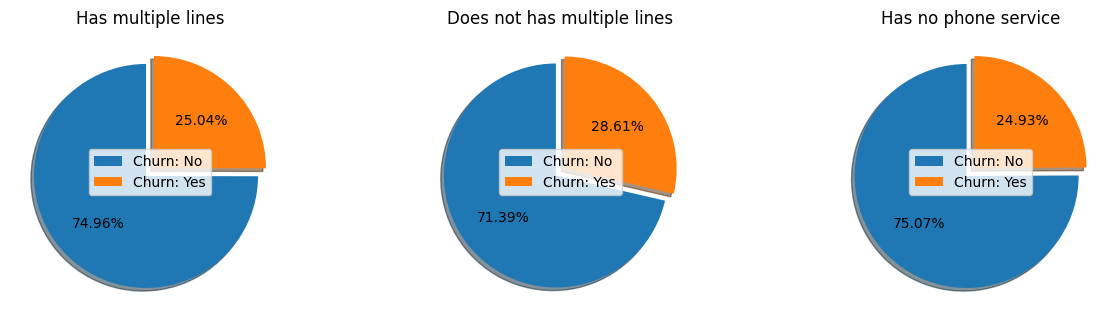

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(2,3,1)
plt.pie(value_1, explode=(0.05,0.05), autopct='%.2f%%', startangle=90, shadow=True,  data=df)
plt.legend(['Churn: No','Churn: Yes'], loc ='center')
plt.title('Has multiple lines')

plt.subplot(2,3,2)
plt.pie(value_2, explode=(0.05,0.05), autopct='%.2f%%', startangle=90, shadow=True,  data=df)
plt.legend(['Churn: No', 'Churn: Yes'], loc ='center')
plt.title('Does not has multiple lines')

plt.subplot(2,3,3)
plt.pie(value_3, explode=(0.05,0.05), autopct='%.2f%%', startangle=90, shadow=True,  data=df)
plt.legend(['Churn: No', 'Churn: Yes'], loc ='center')
plt.title('Has no phone service')

plt.show()

- Customers have multiple lines or not or dont even have phone service also share the same fashion when it come to discontinue doing business with the company

In [ ]:
# value_4 = df['StreamingMovies'][df['StreamingMovies']=="No"].groupby(by=df["Churn"]).count()
# value_5 = df['StreamingMovies'][df['StreamingMovies']=="Yes"].groupby(by=df["Churn"]).count()
# value_6 = df['StreamingMovies'][df['StreamingMovies']=="No internet service"].groupby(by=df["Churn"]).count()

<Axes: xlabel='Count', ylabel='StreamingMovies'>

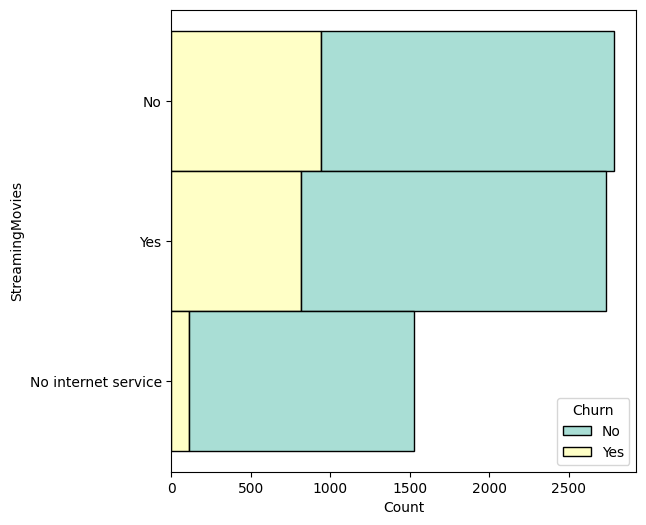

In [ ]:
plt.figure(figsize=(6, 6))
sns.histplot(y = 'StreamingMovies', data = df, hue = 'Churn', multiple = 'stack', palette = 'Set3')

<Axes: xlabel='Count', ylabel='StreamingTV'>

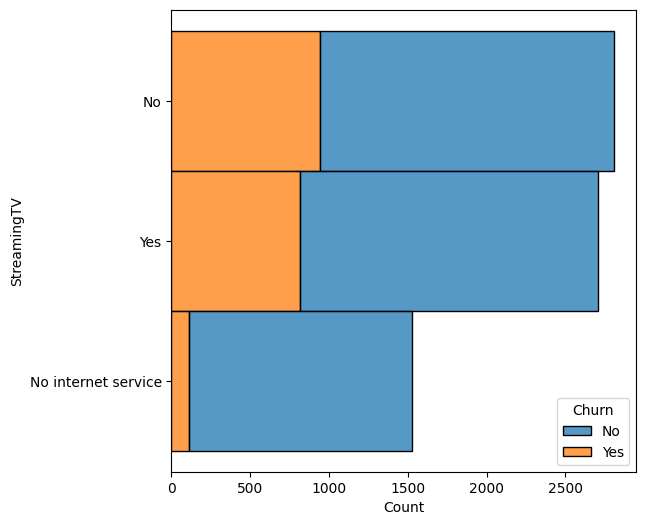

In [ ]:
plt.figure(figsize=(6, 6))
sns.histplot(y = 'StreamingTV', data = df, hue = 'Churn', multiple = 'stack')

# *Preprocessing*

## *Change type of TotalCharges*

In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df = df.dropna(subset=['TotalCharges'])
df['TotalCharges'] = df['TotalCharges'].astype('float64')

<ipython-input-17-589df8bf0975>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype('float64')


## *Split X/y*

In [ ]:
X_v = df.drop('Churn', axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})

## *Split X_num / X_cat*

In [ ]:
X_num = X_v.select_dtypes(include=['int64', 'float64'])
X_cat = X_v.select_dtypes(include=['object'])
X_cat = X_cat.drop("customerID", axis = 1)

## *Take Feature To One Hot*

In [ ]:
features_one_hot = ["Contract", "PaymentMethod", "InternetService"]

## *Encoder*

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in X_cat.columns:
    if col not in features_one_hot:
        label_encoders[col] = LabelEncoder()
        X_cat[col] = label_encoders[col].fit_transform(X_cat[col])

## *One hot*

In [ ]:
X_cat = pd.get_dummies(X_cat, columns=features_one_hot, drop_first=False)
X_cat = X_cat.astype(int)

# *Concatenate X_num/X_cat*

In [ ]:
X = pd.concat([X_num, X_cat], axis=1)

## *Standardization*

In [ ]:
scaler = StandardScaler()
num_cols = list(X_num.columns)
X[num_cols] = scaler.fit_transform(X[num_cols])

# *Plot Corr Matrix*

<Axes: >

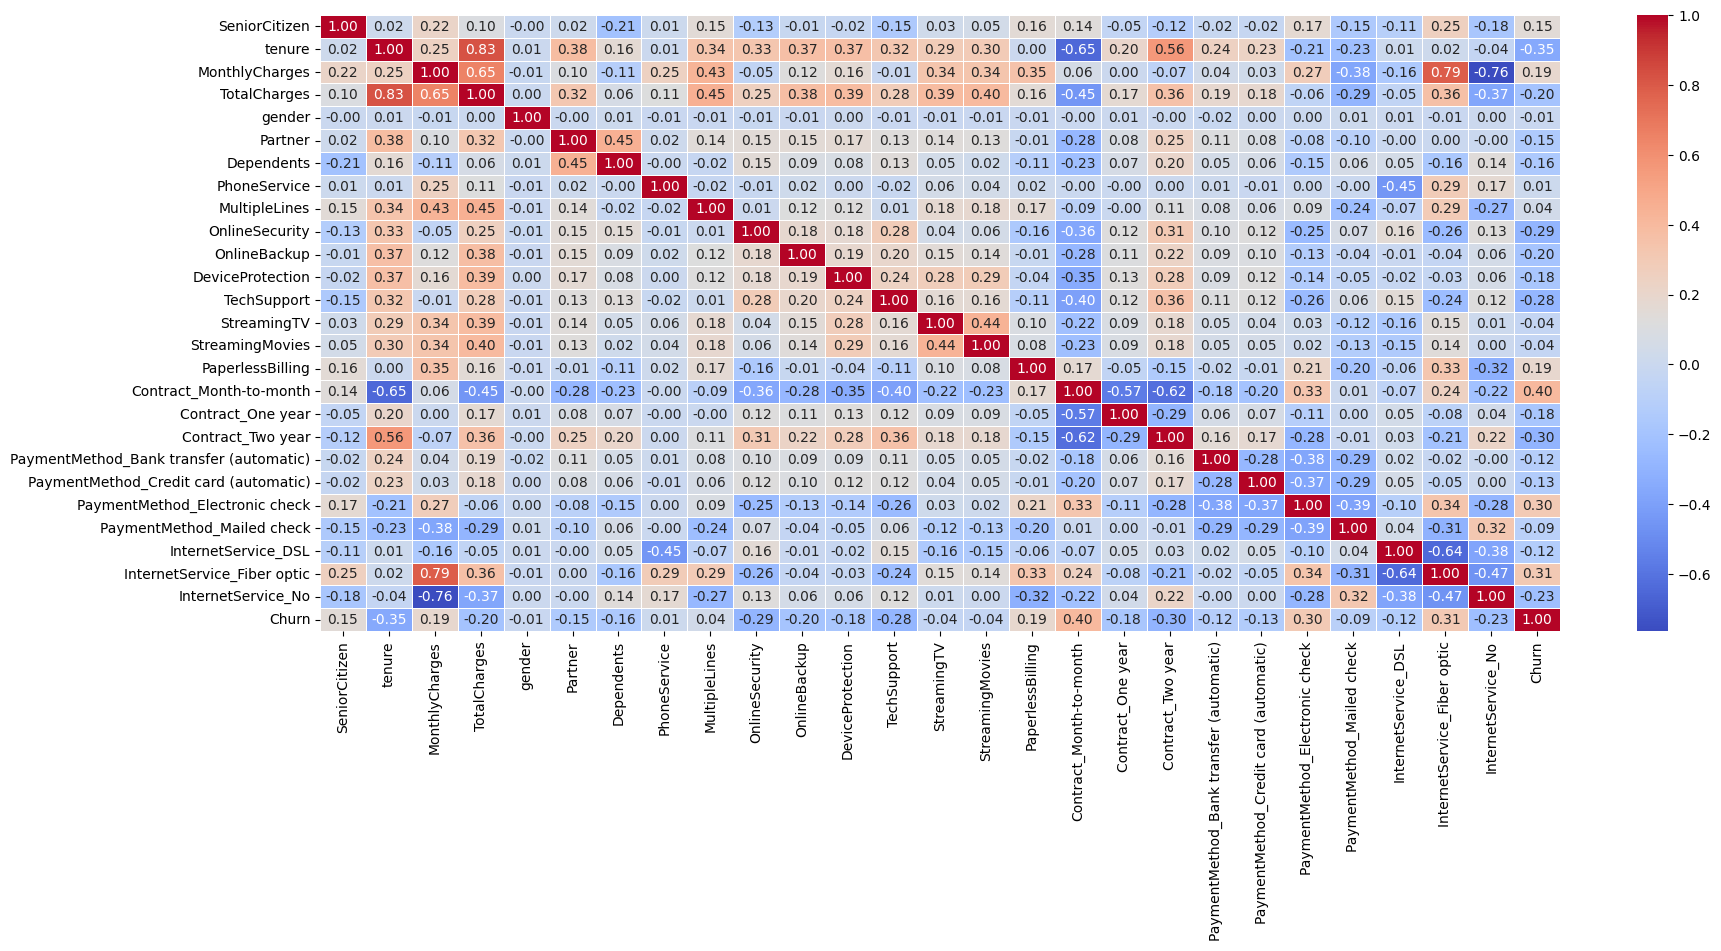

In [ ]:
all = pd.concat([X, y], axis = 1)
corr_table = all.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(corr_table, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [ ]:
X.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,-0.440327,-1.280248,-1.161694,-0.994194,0,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,-0.440327,0.064303,-0.260878,-0.173740,1,0,0,1,0,2,...,0,1,0,0,0,0,1,1,0,0


In [ ]:
X = X.drop(["StreamingTV", "StreamingMovies", "MultipleLines", "PhoneService", "gender"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression with sklearn accuracy is :", accuracy_lr)

Logistic Regression with sklearn accuracy is : 0.8132701421800947


In [ ]:
from scipy.optimize import minimize

def log_loss(w, X, y, C):
    z = X @ w
    sigmoid = 1 / (1 + np.exp(-z))
    loss = -np.mean(y * np.log(sigmoid) + (1 - y) * np.log(1 - sigmoid))
    return loss

def train(X, y, C=1.0):
    n_features = X.shape[1]
    initial_weights = np.zeros(n_features)
    result = minimize(log_loss, initial_weights, args=(X, y, C), method='L-BFGS-B')
    return result.x

def predict(X_test, w):
    y_pred = X_test @ w
    y_pred_sigmoid = 1 / (1 + np.exp(-y_pred))
    return np.array([0 if pred < 0.5 else 1 for pred in y_pred_sigmoid])


In [ ]:
w = train(X_train.values,y_train.values)
y_pred = predict(np.array(X_test), w)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression without sklearn accuracy is :", accuracy)

Logistic Regression without sklearn accuracy is : 0.8132701421800947


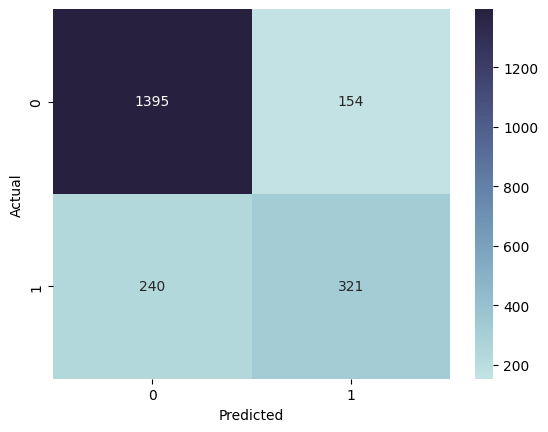

In [ ]:
confusion_matrix_lr = confusion_matrix(y_test, y_pred)
a = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.heatmap(confusion_matrix_lr, annot=True, fmt='g', cmap=a)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### *Cross Validation*

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr_model, X, y, cv=5)
avg_cv_score = np.mean(cv_scores)

In [ ]:
print("Average Logistic Regression Accuracy (Cross Validation):", avg_cv_score)

Average Logistic Regression Accuracy (Cross Validation): 0.8026145436200425


# *Shap*

                                    feature  shap_value
1                                    tenure    0.178843
11                  Contract_Month-to-month    0.054729
13                        Contract_Two year    0.041646
9                               TechSupport    0.020098
19              InternetService_Fiber optic    0.009597
6                            OnlineSecurity    0.009145
5                                Dependents    0.007561
15    PaymentMethod_Credit card (automatic)    0.005785
7                              OnlineBackup    0.004066
10                         PaperlessBilling    0.003161
18                      InternetService_DSL    0.001805
8                          DeviceProtection    0.000015
4                                   Partner   -0.000027
12                        Contract_One year   -0.001870
0                             SeniorCitizen   -0.003389
14  PaymentMethod_Bank transfer (automatic)   -0.003504
17               PaymentMethod_Mailed check   -0

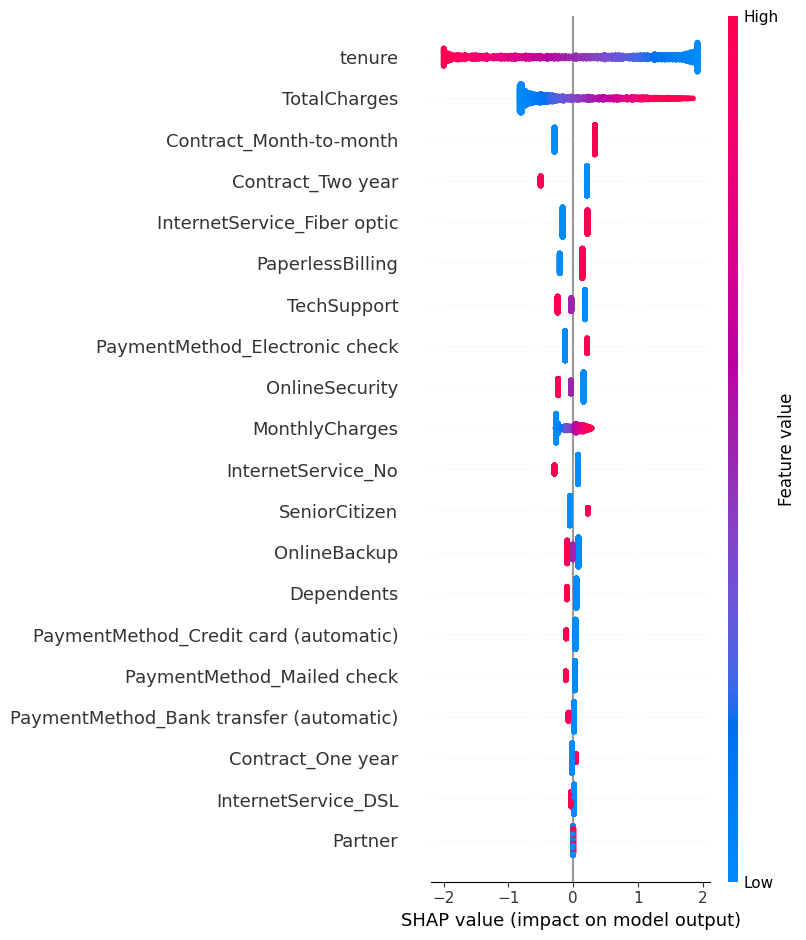

In [ ]:
import shap
import numpy as np
import pandas as pd

feature_names = X.columns

explainer = shap.LinearExplainer(lr_model, X_train)
shap_values = explainer.shap_values(X_test)

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'shap_value': (shap_values).mean(axis=0)
})

feature_importance = feature_importance.sort_values('shap_value', ascending=False)

print(feature_importance)

shap.summary_plot(shap_values, X_test, feature_names=feature_names)